<a href="https://colab.research.google.com/github/eunseo990903/chloe/blob/main/%EC%86%8C%EA%B7%9C%EB%AA%A8_%EA%B0%95%EC%95%84%EC%A7%80%EA%B3%A0%EC%96%91%EC%9D%B4_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
# kaggle.json 파일을 업로드하세요.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"chloeeeshin","key":"a11446b7bdec4424c40fb46c16f73b70"}'}

In [57]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [58]:
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
cd cat

[Errno 2] No such file or directory: 'cat'
/content


In [59]:
!unzip -qq dogs-vs-cats.zip
!unzip -qq train.zip

replace sampleSubmission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
replace train/cat.0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [73]:
import os, shutil, pathlib #pathlib 문자열을 객체로 만들어줌 파일경로 쉽게

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

FileExistsError: ignored

In [76]:
#모델만들기

from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x) #필터의 갯수 32개 , 각각 3장
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x) #필터개수 64개, 각각 32장
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x) #시그모이드했으니 이진크로스엔트로피로 손실적용
model = keras.Model(inputs=inputs, outputs=outputs)


In [75]:
cd

 cats_vs_dogs_small/                            kaggle.json
 convnet_from_scratch.keras                     sample_data/
 convnet_from_scratch_with_augmentation.keras   sampleSubmission.csv
 dogs-vs-cats.zip                               test1.zip
 feature_extraction.keras                       train/
'kaggle (1).json'                               train.zip


In [82]:

model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                       

In [83]:
#모델 훈련설정하기

In [84]:

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [85]:
#데이터 전처리 image_dataset_from_directory

In [86]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)


Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [87]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [88]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [89]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [90]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


In [91]:
#dataset이 반환하는 데이터와 레이블 크기 확인
for data_batch, labels_batch in train_dataset:
    print("데이터 배치 크기:", data_batch.shape)
    print("레이블 배치 크기:", labels_batch.shape)
    break

데이터 배치 크기: (32, 180, 180, 3)
레이블 배치 크기: (32,)


In [92]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 7s 67ms/step - loss: 0.7183 - accuracy: 0.4990 - val_loss: 0.6921 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 4s 64ms/step - loss: 0.6964 - accuracy: 0.5265 - val_loss: 0.6901 - val_accuracy: 0.5300
Epoch 3/30
63/63 [==============================] - 5s 82ms/step - loss: 0.7087 - accuracy: 0.5605 - val_loss: 0.6894 - val_accuracy: 0.5370
Epoch 4/30
63/63 [==============================] - 4s 64ms/step - loss: 0.6794 - accuracy: 0.5885 - val_loss: 0.6769 - val_accuracy: 0.5220
Epoch 5/30
63/63 [==============================] - 6s 92ms/step - loss: 0.6565 - accuracy: 0.6175 - val_loss: 0.6500 - val_accuracy: 0.6170
Epoch 6/30
63/63 [==============================] - 4s 66ms/step - loss: 0.6298 - accuracy: 0.6620 - val_loss: 0.6165 - val_accuracy: 0.6440
Epoch 7/30
63/63 [==============================] - 5s 80ms/step - loss: 0.6179 - accuracy: 0.6640 - val_loss: 0.6000 - val_accuracy: 0.6740
Epoch 8/30
63

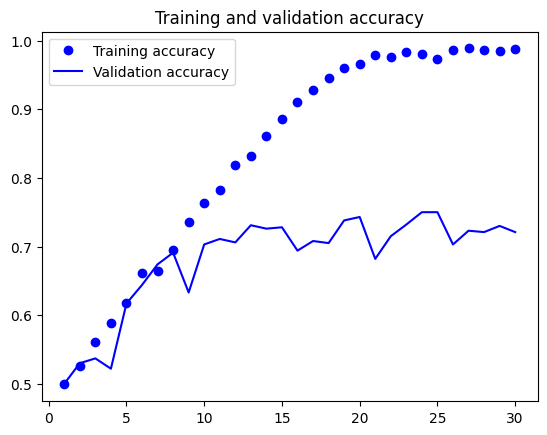

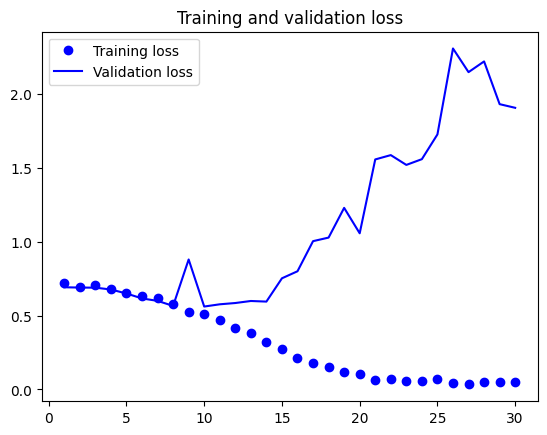

63/63 [==============================] - 4s 47ms/step - loss: 0.5674 - accuracy: 0.7020
테스트 정확도: 0.702


In [93]:
#훈련정확도와 손실그래프

import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()


#테스트 세트에서 모델 평가

test_model = keras.models.load_model("convnet_from_scratch.keras") #kears.model.load_model로 평가 !!!
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"테스트 정확도: {test_acc:.3f}")

#70퍼, TRAINING ACC. 훈련 정확도는 100퍼가 되가는 과적합인데 VALID는 0.7에서 안올라감

데이터 증식

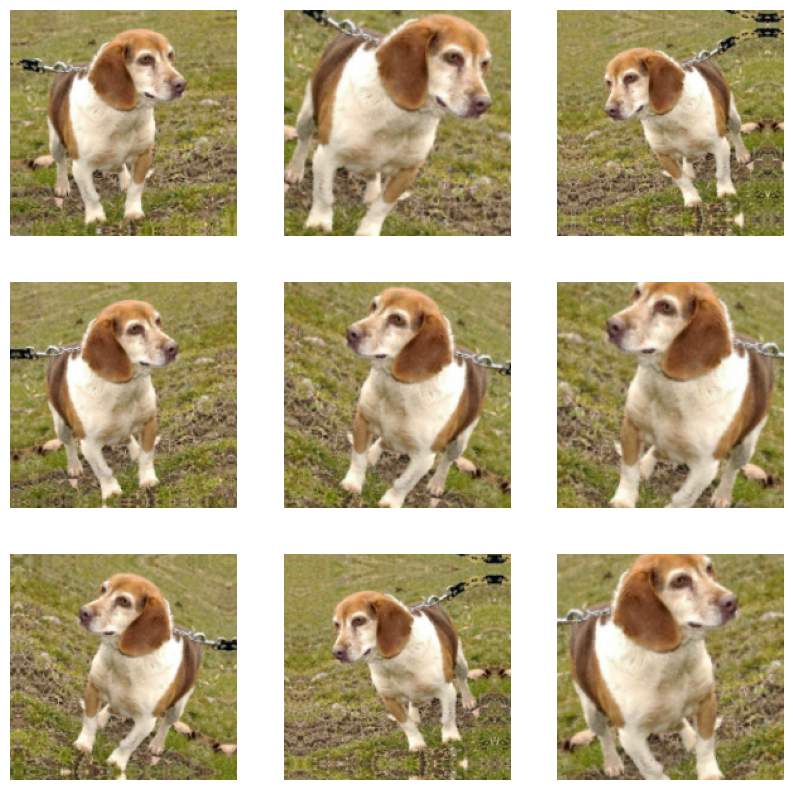

In [115]:
#데이터증식 단계정의
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

#랜덤하게 증식된 훈련이미지 출력
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [95]:
#이미지 증식과 드롭아웃을 포함한 컨브넷
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [96]:
#규제 추가한 컨브넷 훈련
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 7s 67ms/step - loss: 0.7024 - accuracy: 0.5080 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 2/100
63/63 [==============================] - 5s 82ms/step - loss: 0.6938 - accuracy: 0.5190 - val_loss: 0.6905 - val_accuracy: 0.5060
Epoch 3/100
63/63 [==============================] - 5s 72ms/step - loss: 0.6933 - accuracy: 0.5245 - val_loss: 0.6914 - val_accuracy: 0.5160
Epoch 4/100
63/63 [==============================] - 6s 93ms/step - loss: 0.6856 - accuracy: 0.5730 - val_loss: 0.6657 - val_accuracy: 0.6010
Epoch 5/100
63/63 [==============================] - 5s 81ms/step - loss: 0.6562 - accuracy: 0.6010 - val_loss: 0.7639 - val_accuracy: 0.5310
Epoch 6/100
63/63 [==============================] - 5s 81ms/step - loss: 0.6488 - accuracy: 0.6435 - val_loss: 0.7422 - val_accuracy: 0.5300
Epoch 7/100
63/63 [==============================] - 4s 66ms/step - loss: 0.6187 - accuracy: 0.6585 - val_loss: 0.6399 - val_accuracy: 0.6230
Epoch 

In [97]:
#테스트 세트에서 모델 훈련하기
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"테스트 정확도: {test_acc:.3f}")

63/63 [==============================] - 3s 35ms/step - loss: 0.5024 - accuracy: 0.8130
테스트 정확도: 0.813


사전 훈련된 모델 사용
VGG16 합성곱 기반 층 만들기

In [98]:
#VGG16 이용한  합성곱모델 특성 추출
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [99]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [100]:
#데이터 증식을 사용하지 않는 빠른 특성 추출
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 26ms/step


In [101]:
train_features.shape

(2000, 5, 5, 512)

In [102]:
#밀접연결분류하고 정의
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 1s 9ms/step - loss: 16.9353 - accuracy: 0.9150 - val_loss: 6.5072 - val_accuracy: 0.9580
Epoch 2/20
63/63 [==============================] - 0s 6ms/step - loss: 3.2242 - accuracy: 0.9805 - val_loss: 5.1211 - val_accuracy: 0.9670
Epoch 3/20
63/63 [==============================] - 0s 7ms/step - loss: 2.1283 - accuracy: 0.9855 - val_loss: 4.3821 - val_accuracy: 0.9720
Epoch 4/20
63/63 [==============================] - 0s 5ms/step - loss: 1.5315 - accuracy: 0.9895 - val_loss: 7.1549 - val_accuracy: 0.9620
Epoch 5/20
63/63 [==============================] - 0s 5ms/step - loss: 0.2047 - accuracy: 0.9955 - val_loss: 4.6925 - val_accuracy: 0.9730
Epoch 6/20
63/63 [==============================] - 0s 6ms/step - loss: 0.6327 - accuracy: 0.9950 - val_loss: 5.3108 - val_accuracy: 0.9740
Epoch 7/20
63/63 [==============================] - 0s 5ms/step - loss: 0.8630 - accuracy: 0.9915 - val_loss: 9.9149 - val_accuracy: 0.9610
Epoch 8/20
63/63 [=

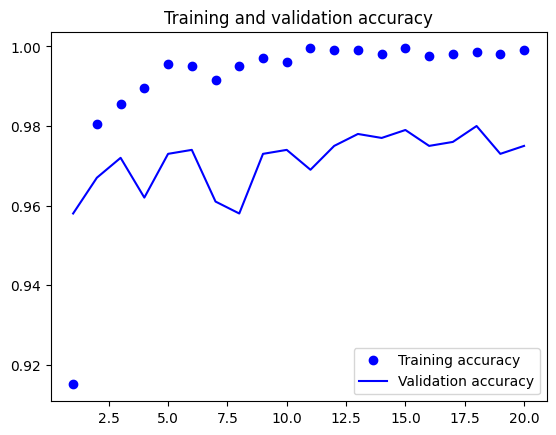

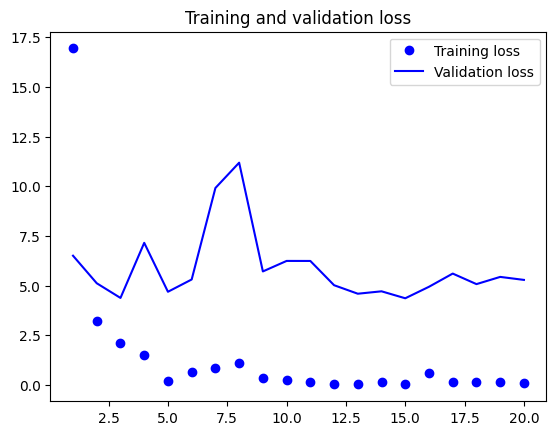

63/63 [==============================] - 0s 4ms/step - loss: 6.1056 - accuracy: 0.9740
테스트 정확도: 0.974


In [103]:
#훈련검증손실 그래프
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()
#테스트데이터에서 모델 평가
test_model = keras.models.load_model(
    "feature_extraction.keras")
test_loss, test_acc = test_model.evaluate(test_features,test_labels)
print(f"테스트 정확도: {test_acc:.3f}") #97퍼, 드롭아웃해도 훈련이 시작되면서 바로 과대적합, 데이터 증식 안해서

In [105]:
#데이터 증식을 사용한 특성 추출
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

#동결전후 훈련가능한 리스트 출력

conv_base.trainable = True
print("합성곱 기반 층을 동결하기 전의 훈련 가능한 가중치 개수:",
      len(conv_base.trainable_weights))


conv_base.trainable = False
print("합성곱 기반 층을 동결한 후의 훈련 가능한 가중치 개수:",
      len(conv_base.trainable_weights))

합성곱 기반 층을 동결하기 전의 훈련 가능한 가중치 개수: 26
합성곱 기반 층을 동결한 후의 훈련 가능한 가중치 개수: 0


In [106]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [107]:

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 11s 139ms/step - loss: 17.7577 - accuracy: 0.8980 - val_loss: 2.5468 - val_accuracy: 0.9760
Epoch 2/50
63/63 [==============================] - 11s 172ms/step - loss: 6.4137 - accuracy: 0.9435 - val_loss: 3.2215 - val_accuracy: 0.9760
Epoch 3/50
63/63 [==============================] - 9s 135ms/step - loss: 4.7249 - accuracy: 0.9570 - val_loss: 5.1254 - val_accuracy: 0.9700
Epoch 4/50
63/63 [==============================] - 9s 135ms/step - loss: 4.6689 - accuracy: 0.9615 - val_loss: 3.0490 - val_accuracy: 0.9800
Epoch 5/50
63/63 [==============================] - 9s 136ms/step - loss: 4.8255 - accuracy: 0.9640 - val_loss: 8.2671 - val_accuracy: 0.9570
Epoch 6/50
63/63 [==============================] - 9s 138ms/step - loss: 3.3102 - accuracy: 0.9705 - val_loss: 3.5917 - val_accuracy: 0.9760
Epoch 7/50
63/63 [==============================] - 9s 137ms/step - loss: 3.6151 - accuracy: 0.9720 - val_loss: 5.5029 - val_accuracy: 0.9680
Epo

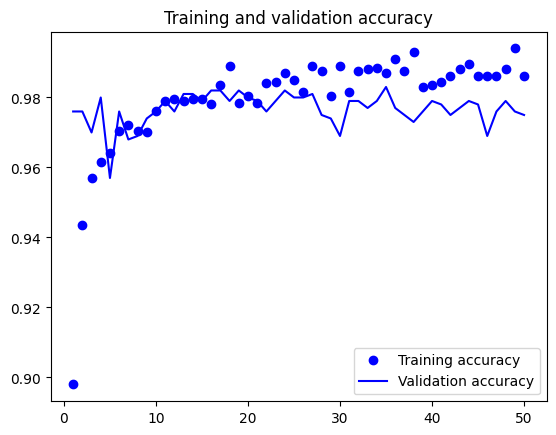

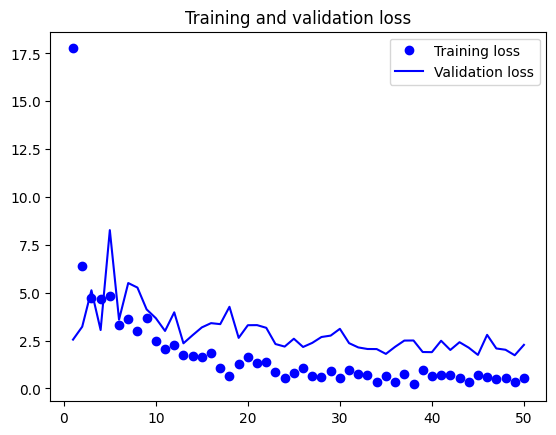

In [108]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [109]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"테스트 정확도: {test_acc:.3f}")

63/63 [==============================] - 6s 85ms/step - loss: 1.2828 - accuracy: 0.9765
테스트 정확도: 0.976


사전훈련모델 미세조정

In [110]:
#사전훈련된 모델 미세조정
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [111]:
#마지막부터 거꾸로 4층 모든 층 동결
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [112]:
#모델 미세조정
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks) #97.9퍼

Epoch 1/30
63/63 [==============================] - 13s 157ms/step - loss: 0.2931 - accuracy: 0.9910 - val_loss: 2.6363 - val_accuracy: 0.9690
Epoch 2/30
63/63 [==============================] - 10s 155ms/step - loss: 0.2690 - accuracy: 0.9915 - val_loss: 2.3508 - val_accuracy: 0.9750
Epoch 3/30
63/63 [==============================] - 10s 157ms/step - loss: 0.3315 - accuracy: 0.9925 - val_loss: 2.4987 - val_accuracy: 0.9730
Epoch 4/30
63/63 [==============================] - 10s 153ms/step - loss: 0.2939 - accuracy: 0.9930 - val_loss: 2.6069 - val_accuracy: 0.9710
Epoch 5/30
63/63 [==============================] - 10s 156ms/step - loss: 0.0961 - accuracy: 0.9935 - val_loss: 2.0767 - val_accuracy: 0.9810
Epoch 6/30
63/63 [==============================] - 10s 153ms/step - loss: 0.1480 - accuracy: 0.9895 - val_loss: 2.4419 - val_accuracy: 0.9730
Epoch 7/30
63/63 [==============================] - 10s 160ms/step - loss: 0.2344 - accuracy: 0.9940 - val_loss: 2.0168 - val_accuracy: 0.9810

In [113]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"테스트 정확도: {test_acc:.3f}")

63/63 [==============================] - 7s 86ms/step - loss: 1.2465 - accuracy: 0.9785
테스트 정확도: 0.979
